## Bitcoin Price Prediction | Machine Learning Project

63011119 Chakrin Deesit\
63011216 Nontharat Kijteng\
63011278 Prima Sirinapapant

### Project Aims
- Predict the Bitcoin opening prices up to 1 week in the future at a tolerable risk
- Gain better insights on how bitcoin prices behaves

### Project Setup
- Download dataset from https://www.kaggle.com/datasets/jesusgraterol/bitcoin-hist-klines-all-intervals-2017-2023
- Install Python
- Run `pip install -r requirements.txt`
- Run `ipynb` file

### Data Preprocessing

In [1]:
import pandas as pd

DATASET_PATH = "dataset.json"
btc_price_history = pd.read_json(DATASET_PATH)

### Data Visualization

The following section focuses on the discovery and data visualization of the dataset.

In [2]:
import matplotlib.pyplot as plt

def plot_price_history(title, timestamp, price, label):
    plt.figure(figsize=(12, 6))
    plt.plot(timestamp, price, label=label, color='blue')
    plt.xlabel("Timestamp")
    plt.ylabel("Price (USDT)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
class PriceHistory:
    def __init__(self, dataset):
        self.dataset = dataset

    def get_interval_dataframe(self, interval):
        interval_data = self.dataset[interval]
        open_timestamps = pd.to_datetime(interval_data["ot"], unit='ms')
        close_timestamps = pd.to_datetime(interval_data["ct"], unit='ms')

        interval_df = pd.DataFrame({
            "OpenTimestamp": open_timestamps,
            "CloseTimestamp": close_timestamps,
            "OpenPrice": interval_data["o"],
            "HighPrice": interval_data["h"],
            "LowPrice": interval_data["l"],
            "ClosePrice": interval_data["c"],
            "Volume": interval_data["v"]
        })

        return interval_df

price_history = PriceHistory(btc_price_history)

In [4]:
interval_df_1m = price_history.get_interval_dataframe("1m")
interval_df_1h = price_history.get_interval_dataframe("1h")
interval_df_1d = price_history.get_interval_dataframe("1d")
interval_df_1w = price_history.get_interval_dataframe("1w")
interval_df_1mm = price_history.get_interval_dataframe("1mm")
interval_df_3mm = price_history.get_interval_dataframe("3mm")

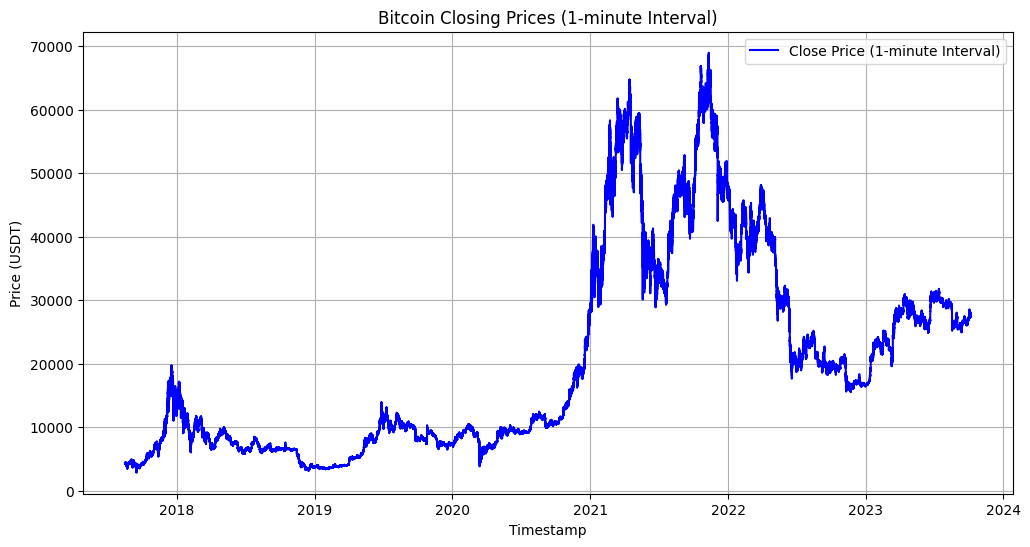

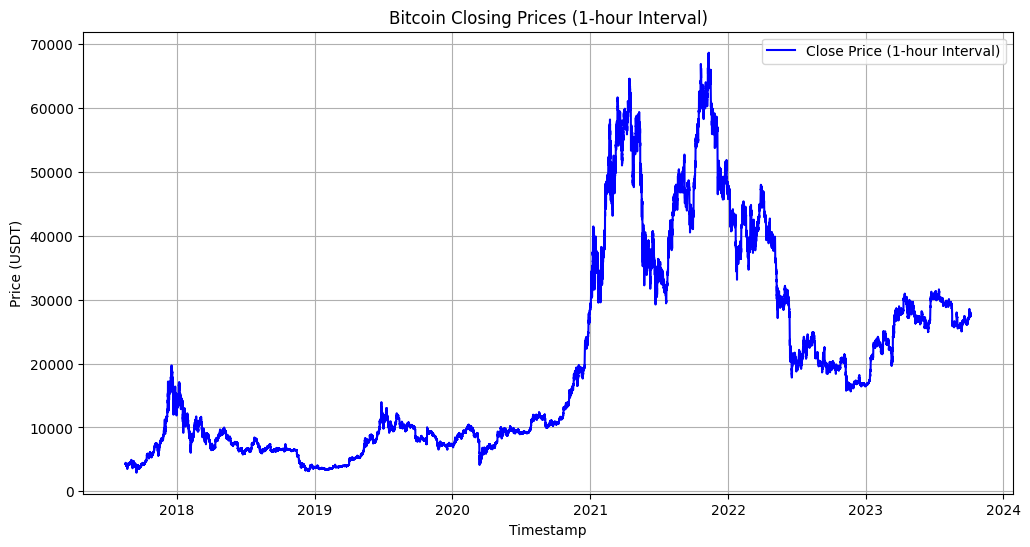

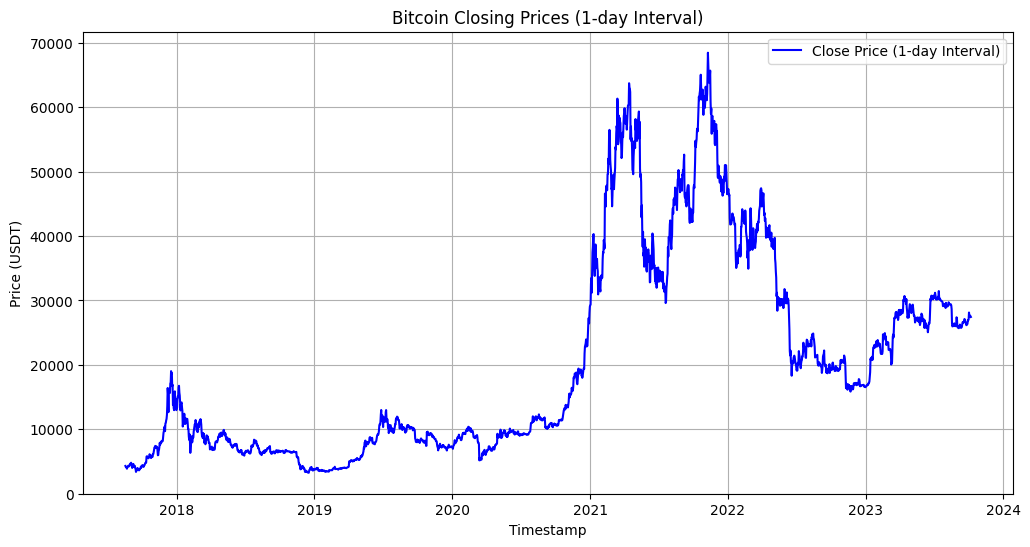

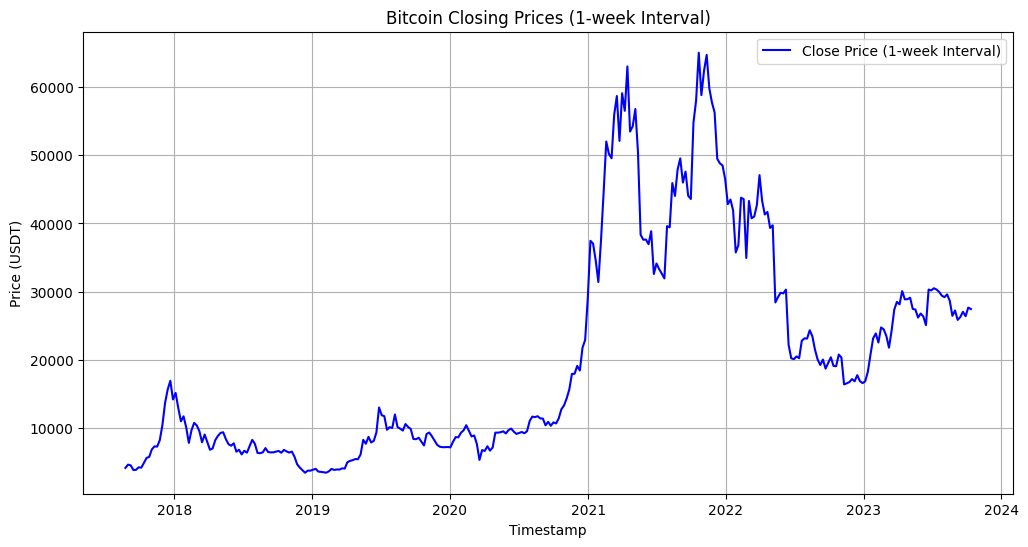

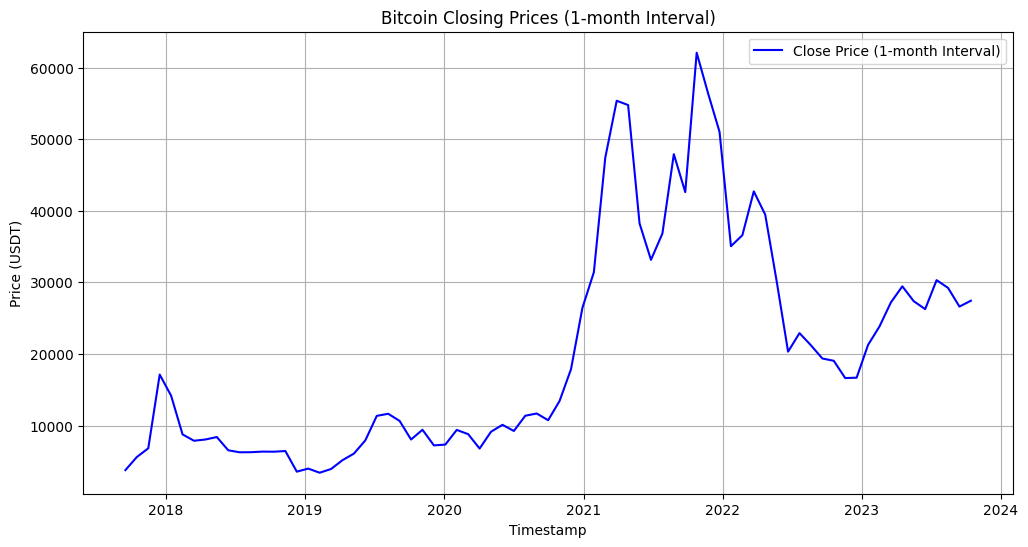

In [5]:
plot_price_history(
    "Bitcoin Closing Prices (1-minute Interval)",
    interval_df_1m["CloseTimestamp"],
    interval_df_1m["ClosePrice"],
    "Close Price (1-minute Interval)"
)

plot_price_history(
    "Bitcoin Closing Prices (1-hour Interval)",
    interval_df_1h["CloseTimestamp"],
    interval_df_1h["ClosePrice"],
    "Close Price (1-hour Interval)"
)

plot_price_history(
    "Bitcoin Closing Prices (1-day Interval)",
    interval_df_1d["CloseTimestamp"],
    interval_df_1d["ClosePrice"],
    "Close Price (1-day Interval)"
)

plot_price_history(
    "Bitcoin Closing Prices (1-week Interval)",
    interval_df_1w["CloseTimestamp"],
    interval_df_1w["ClosePrice"],
    "Close Price (1-week Interval)"
)

plot_price_history(
    "Bitcoin Closing Prices (1-month Interval)",
    interval_df_1mm["CloseTimestamp"],
    interval_df_1mm["ClosePrice"],
    "Close Price (1-month Interval)"
)

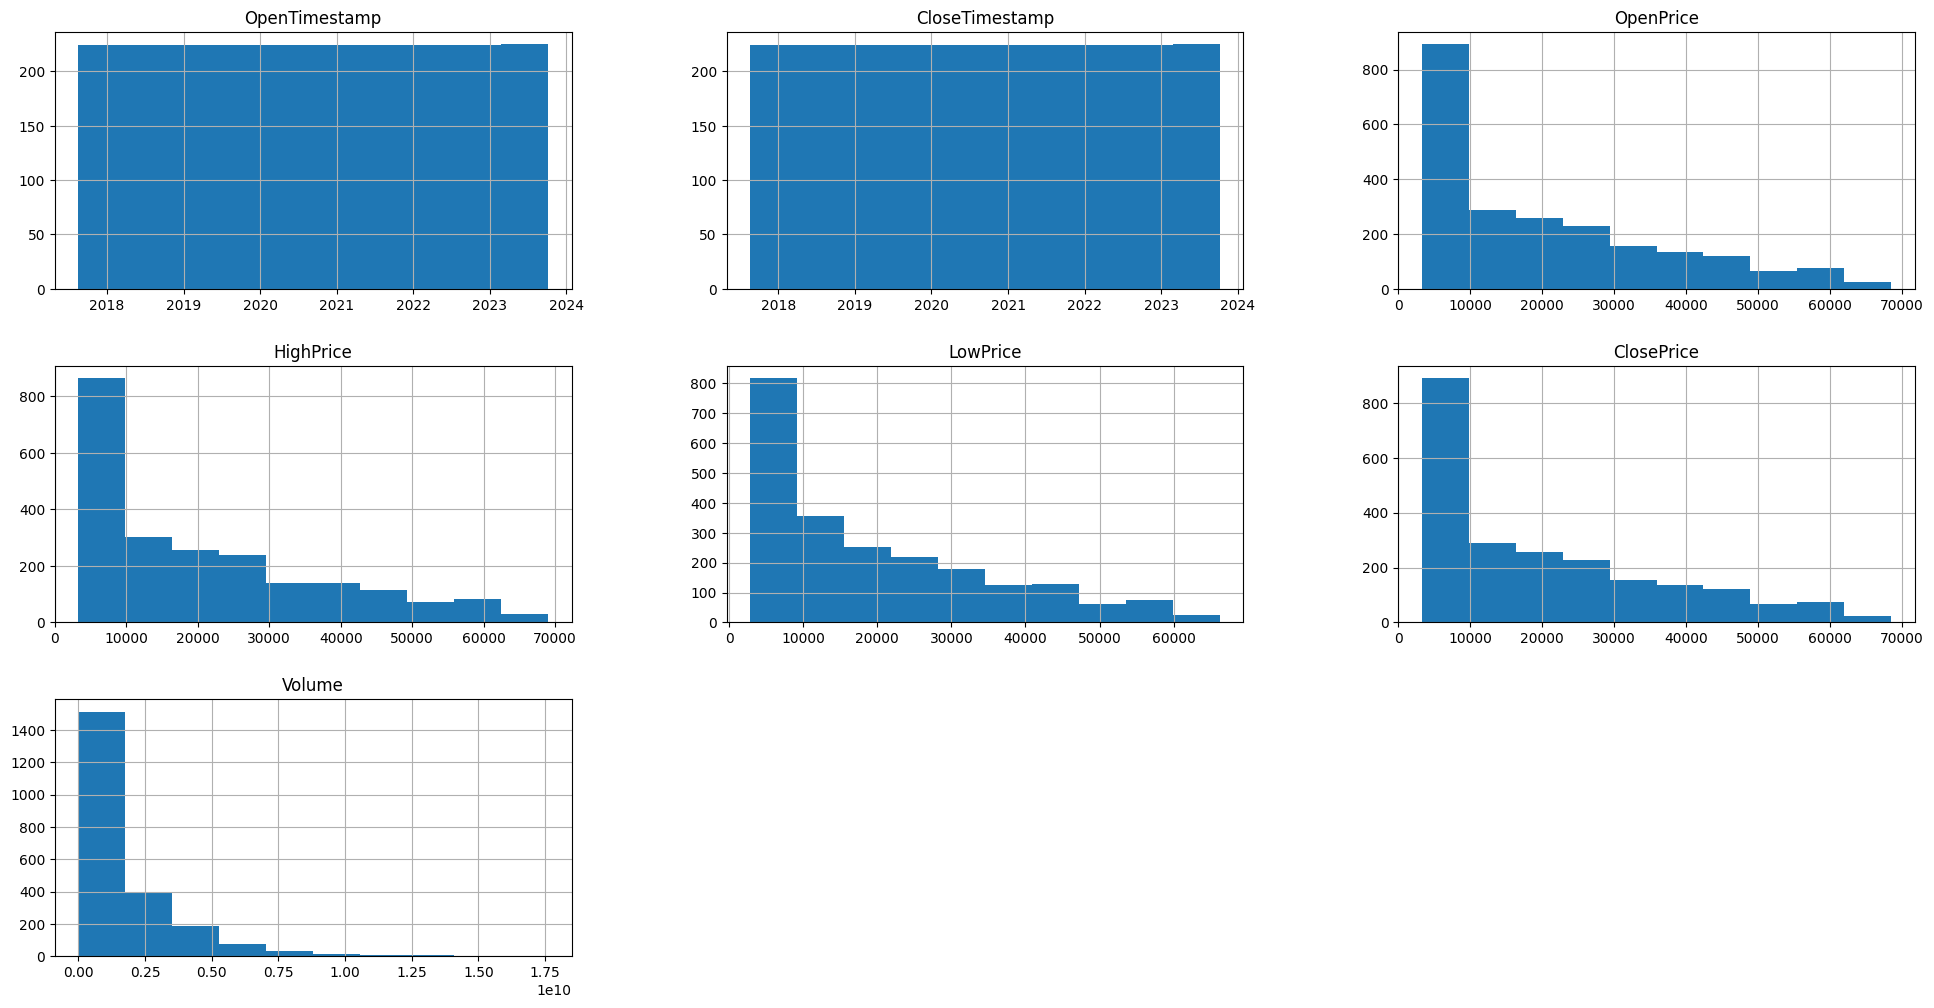

In [6]:
interval_df_1d.hist(figsize=(24, 12))
plt.show()

array([[<Axes: xlabel='OpenPrice', ylabel='OpenPrice'>,
        <Axes: xlabel='HighPrice', ylabel='OpenPrice'>,
        <Axes: xlabel='LowPrice', ylabel='OpenPrice'>,
        <Axes: xlabel='ClosePrice', ylabel='OpenPrice'>,
        <Axes: xlabel='Volume', ylabel='OpenPrice'>],
       [<Axes: xlabel='OpenPrice', ylabel='HighPrice'>,
        <Axes: xlabel='HighPrice', ylabel='HighPrice'>,
        <Axes: xlabel='LowPrice', ylabel='HighPrice'>,
        <Axes: xlabel='ClosePrice', ylabel='HighPrice'>,
        <Axes: xlabel='Volume', ylabel='HighPrice'>],
       [<Axes: xlabel='OpenPrice', ylabel='LowPrice'>,
        <Axes: xlabel='HighPrice', ylabel='LowPrice'>,
        <Axes: xlabel='LowPrice', ylabel='LowPrice'>,
        <Axes: xlabel='ClosePrice', ylabel='LowPrice'>,
        <Axes: xlabel='Volume', ylabel='LowPrice'>],
       [<Axes: xlabel='OpenPrice', ylabel='ClosePrice'>,
        <Axes: xlabel='HighPrice', ylabel='ClosePrice'>,
        <Axes: xlabel='LowPrice', ylabel='ClosePrice'>,
 

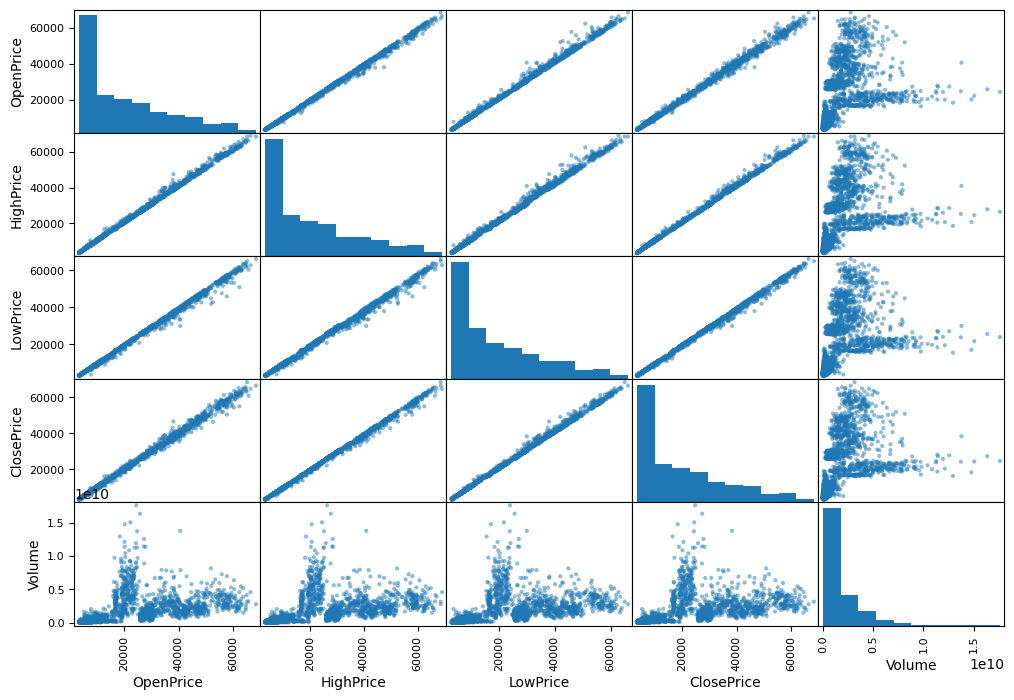

In [7]:
from pandas.plotting import scatter_matrix

attributes = ['OpenTimestamp','CloseTimestamp', 'OpenPrice', 'HighPrice', "LowPrice", "ClosePrice", "Volume"]
scatter_matrix(interval_df_1d[attributes], figsize=(12,8))

### Model Experiment

The following section aims to explore the different machines learning models. Including:
- Linear Regression
- Random Forests
- Gradient Boosting

In [8]:
RANDOM_STATE = 42

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def plot_price_predictions(title, interval_df, model):
    X = interval_df["CloseTimestamp"].values.astype(int).reshape(-1, 1)
    y = interval_df["ClosePrice"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')

    plt.figure(figsize=(12, 6))
    plt.plot(interval_df['CloseTimestamp'][-len(y_test):], y_test, color='blue', label='Actual Prices')
    plt.plot(interval_df['CloseTimestamp'][-len(y_test):], y_pred, color='red', label='Predicted Prices')
    plt.xlabel("Timestamp")
    plt.ylabel("Price")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, mse, mae, r2

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

def plot_price_predictions_poly(title, interval_df, model, degree):
    X = interval_df["CloseTimestamp"].values.astype(int).reshape(-1, 1)
    y = interval_df["ClosePrice"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')

    plt.figure(figsize=(12, 6))
    plt.plot(interval_df['CloseTimestamp'][-len(y_test):], y_test, color='blue', label='Actual Prices')
    plt.plot(interval_df['CloseTimestamp'][-len(y_test):], y_pred, color='red', label='Predicted Prices')
    plt.xlabel("Timestamp")
    plt.ylabel("Price")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, mse, mae, r2

Linear Regression

Mean Squared Error (MSE): 208125856.57
Mean Absolute Error (MAE): 12317.11
R-squared (R2): -0.04


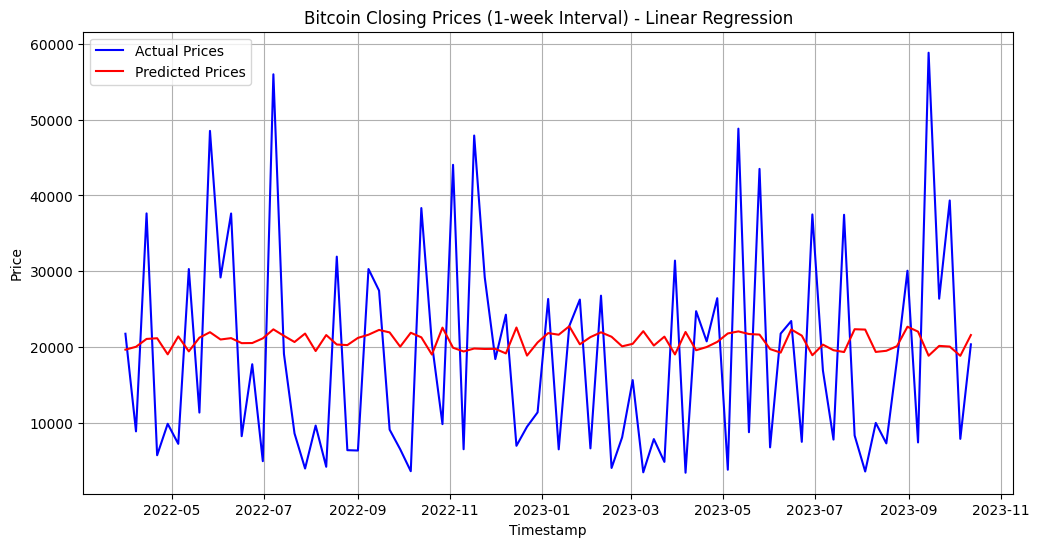

In [11]:
from sklearn.linear_model import LinearRegression

linear_regression_1w = LinearRegression()

trained_linear_regression_1w, lr_mse, lr_mae, lr_r2 = plot_price_predictions(
    "Bitcoin Closing Prices (1-week Interval) - Linear Regression",
    interval_df_1w,
    linear_regression_1w
)

Random Forests

Mean Squared Error (MSE): 252608717.47
Mean Absolute Error (MAE): 13584.37
R-squared (R2): -0.26


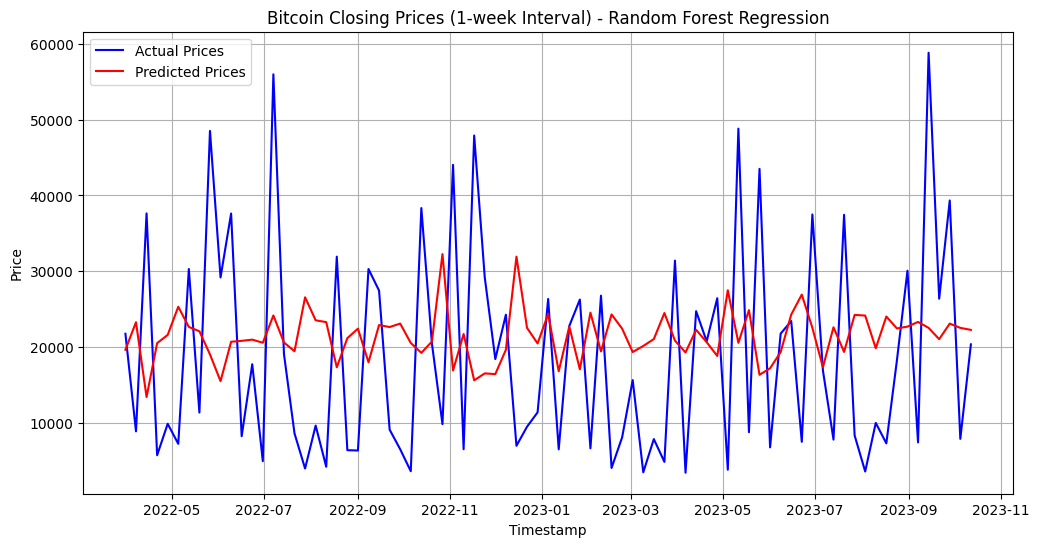

In [12]:
from sklearn.ensemble import RandomForestRegressor

hyperparameters = {
    "n_estimators": 256,
    "max_depth": 8,
    "min_samples_leaf": 4,
}

random_forest_1w = RandomForestRegressor(
    n_estimators=hyperparameters.get('n_estimators'),
    max_depth=hyperparameters.get('max_depth'),
    min_samples_leaf=hyperparameters.get('min_samples_leaf'),
    random_state=RANDOM_STATE,
    n_jobs=-1
)

trained_random_forest_1w, rf_mse, rf_mae, rf_r2 = plot_price_predictions(
    "Bitcoin Closing Prices (1-week Interval) - Random Forest Regression",
    interval_df_1w,
    random_forest_1w,
)

In [13]:
prediction = trained_random_forest_1w.predict([[1696204799], [1696809599], [1697414399]])

prediction

array([24246.89411179, 24166.4934479 , 24166.4934479 ])

Gradient Boosting

Mean Squared Error (MSE): 256665184.78
Mean Absolute Error (MAE): 13829.37
R-squared (R2): -0.28


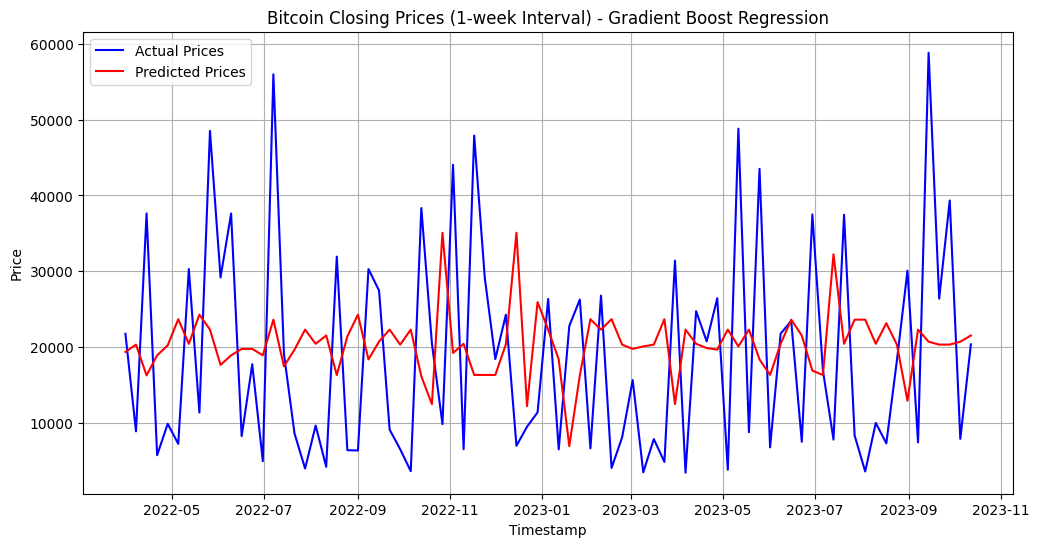

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

hyperparameters = {
    "n_estimators": 128,
    "max_depth": 2,
    "learning_rate": 0.1,
}

gradient_boost_1w = GradientBoostingRegressor(
    n_estimators=hyperparameters.get('n_estimators'),
    max_depth=hyperparameters.get('max_depth'),
    random_state=RANDOM_STATE,
)

trained_gradient_boost_1w, gb_mse, gb_mae, gb_r2 = plot_price_predictions(
    "Bitcoin Closing Prices (1-week Interval) - Gradient Boost Regression",
    interval_df_1w,
    gradient_boost_1w,
)

### Fine-Tuning

This section aims to fine-tune the selected models to improve error metrics such as the Mean Squared Error (MSE), Mean Absolute Error (MAE), and the R² value.

Regularization techniques like Ridge and Lasso regression will be explored.

Ridge Regression

Mean Squared Error (MSE): 208125856.57
Mean Absolute Error (MAE): 12317.11
R-squared (R2): -0.04


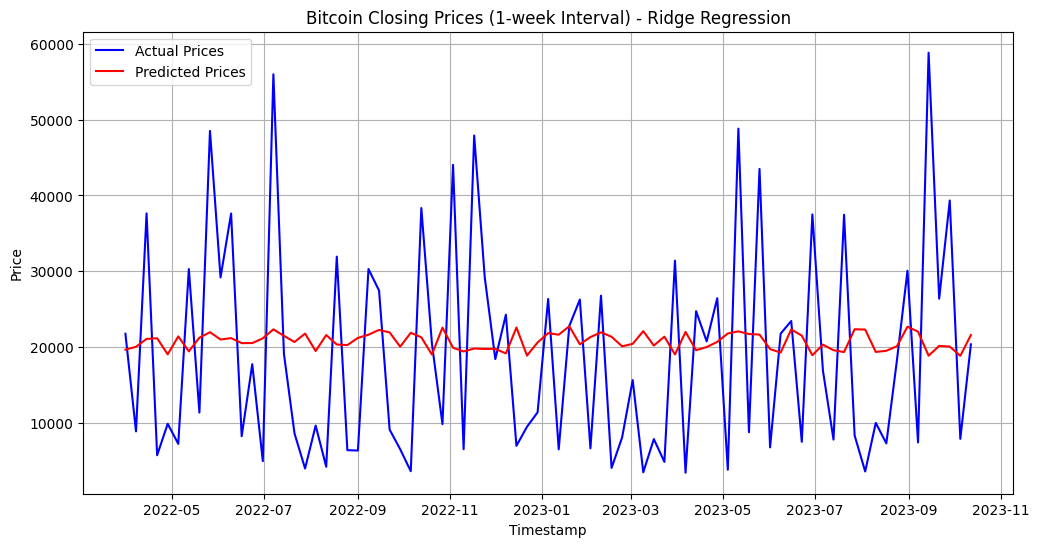

In [15]:
from sklearn.linear_model import Ridge

ridge_regression_1w = Ridge(alpha=1)

trained_ridge_regression_1w, rr_mse, rr_mae, rr_r2 = plot_price_predictions(
    "Bitcoin Closing Prices (1-week Interval) - Ridge Regression",
    interval_df_1w,
    ridge_regression_1w
)

Lasso Regression

Mean Squared Error (MSE): 208125856.57
Mean Absolute Error (MAE): 12317.11
R-squared (R2): -0.04


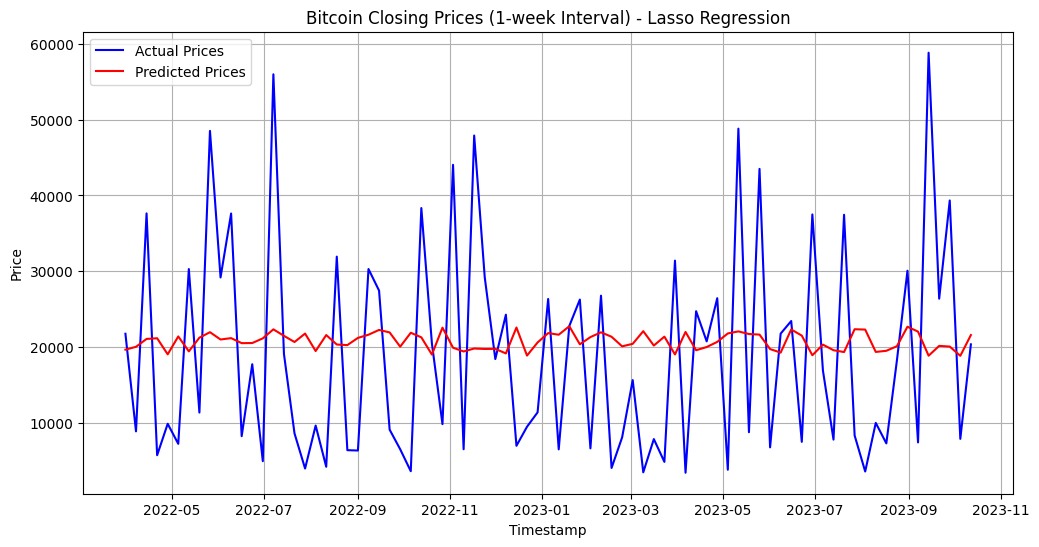

In [16]:
from sklearn.linear_model import Lasso

lasso_regression_1w = Lasso(alpha=1)

trained_lasso_regression_1w, ls_mse, ls_mae, ls_r2 = plot_price_predictions(
    "Bitcoin Closing Prices (1-week Interval) - Lasso Regression",
    interval_df_1w,
    lasso_regression_1w
)

#### Polynomial Regression

To increase the complexity of the linear regression model, the polynomial regression introduces new dimensions and coefficients to better fit the training dataset.

Mean Squared Error (MSE): 203866819.34
Mean Absolute Error (MAE): 12159.92
R-squared (R2): -0.02


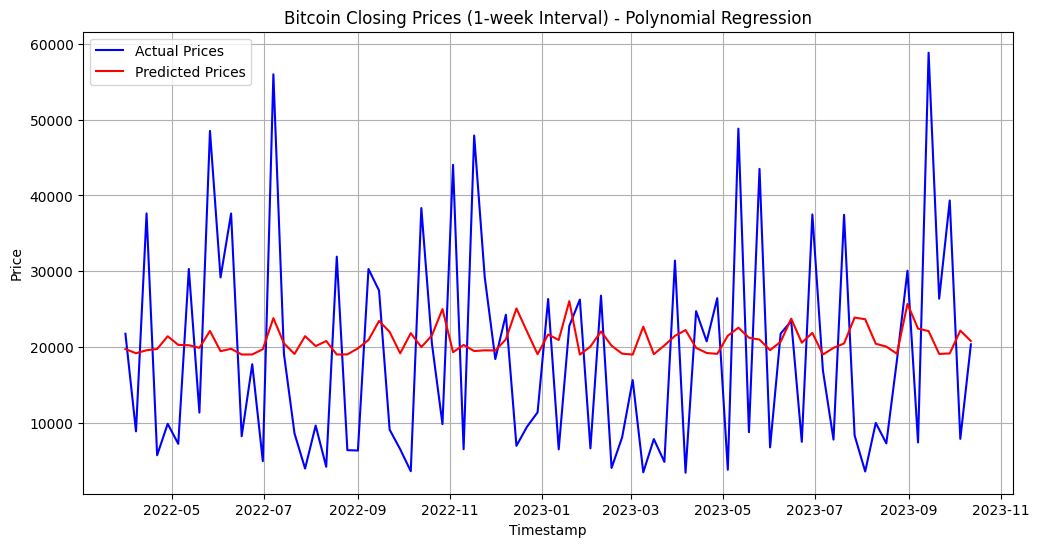

In [17]:
poly_regression_1w = LinearRegression()

trained_poly_regression_1w, pr_mse, pr_mae, pr_r2 = plot_price_predictions_poly(
    "Bitcoin Closing Prices (1-week Interval) - Polynomial Regression",
    interval_df_1w,
    poly_regression_1w,
    2
)

#### Random Forest

The GridSearchCV module is used to find the best hyperparameters for the random forest. The 3 hyperparameters are the number of trees (n_estimators), the maximum tree depth, and the minimum sample leaves.

In [18]:
from sklearn.model_selection import GridSearchCV

X = interval_df_1w["CloseTimestamp"].values.astype(int).reshape(-1, 1)
y = interval_df_1w["ClosePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

param_grid = {
    'n_estimators': [8, 32, 64, 128, 256, 512],
    'max_depth': [None, 8, 16, 32],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

random_forest = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(random_forest, param_grid, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 16, 'n_estimators': 256}


Mean Squared Error (MSE): 216976414.16
Mean Absolute Error (MAE): 12616.45
R-squared (R2): -0.08


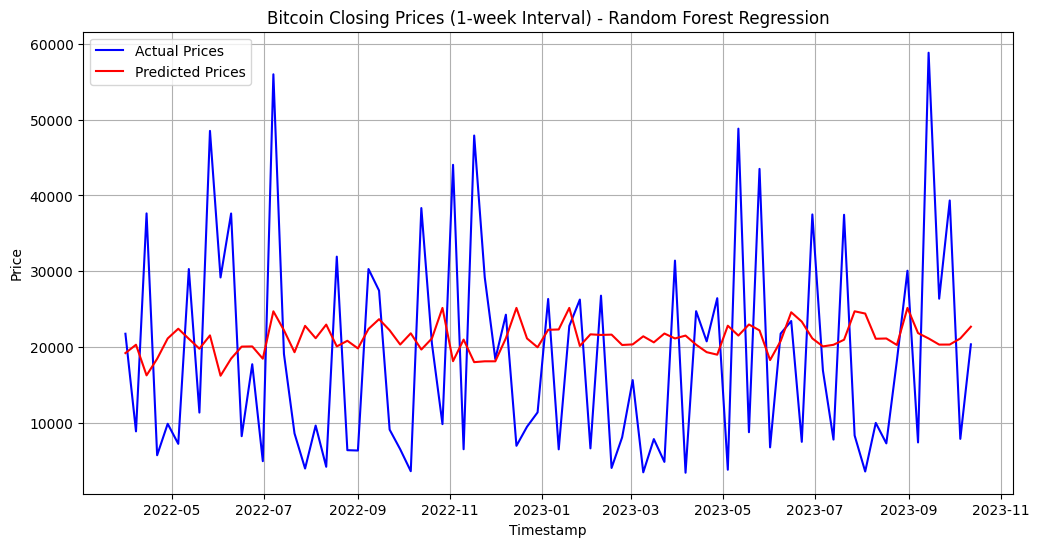

In [19]:
hyperparameters = {
    "n_estimators": 256,
    "max_depth": None,
    "min_samples_leaf": 16,
}

random_forest_1w = RandomForestRegressor(
    n_estimators=hyperparameters.get('n_estimators'),
    max_depth=hyperparameters.get('max_depth'),
    min_samples_leaf=hyperparameters.get('min_samples_leaf'),
    random_state=RANDOM_STATE,
    n_jobs=-1
)

trained_random_forest_1w, rf_mse, rf_mae, rf_r2 = plot_price_predictions(
    "Bitcoin Closing Prices (1-week Interval) - Random Forest Regression",
    interval_df_1w,
    random_forest_1w,
)

In [20]:
prediction = trained_random_forest_1w.predict([[1696204799], [1696809599]])

prediction

array([24479.29537176, 24714.89578962])

#### Gradient Boost

The GridSearchCV module is used to find the best hyperparameters for the gradient boost. The 3 hyperparameters are the number of trees (n_estimators), the maximum tree depth, and the learning rate.

In [21]:
from sklearn.model_selection import GridSearchCV

X = interval_df_1w["CloseTimestamp"].values.astype(int).reshape(-1, 1)
y = interval_df_1w["ClosePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

param_grid = {
    'n_estimators': [8, 32, 64, 128, 256, 512],
    'max_depth': [None, 2, 4, 6, 8, 10, 12],
    'learning_rate': [0.1, 0.01, 0.001],
}

gradient_boost = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(gradient_boost, param_grid, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 8}


Mean Squared Error (MSE): 206912011.10
Mean Absolute Error (MAE): 12324.17
R-squared (R2): -0.03


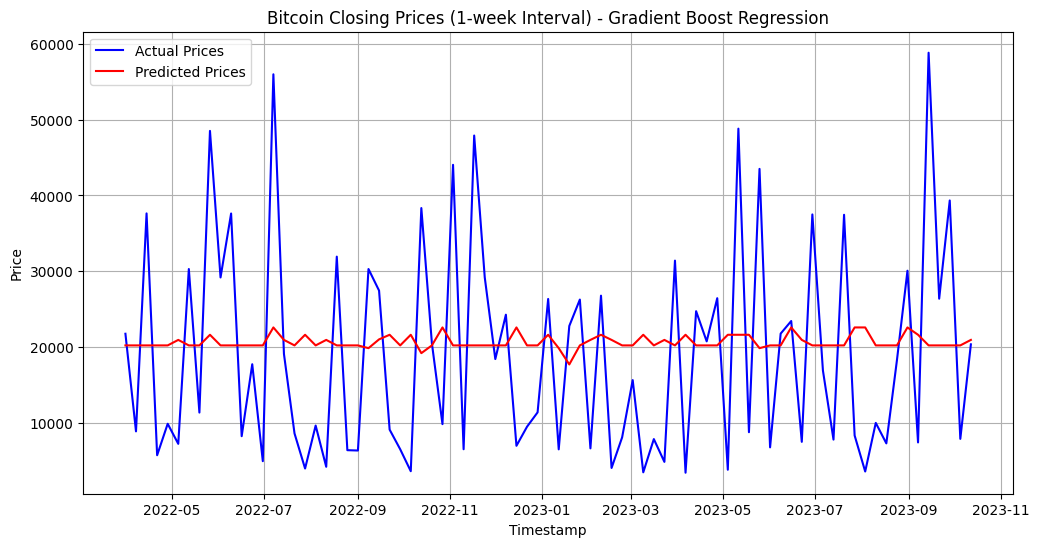

In [22]:
hyperparameters = {
    "n_estimators": 8,
    "max_depth": 2,
    "learning_rate": 0.001,
}

gradient_boost_1w = GradientBoostingRegressor(
    n_estimators=hyperparameters.get('n_estimators'),
    max_depth=hyperparameters.get('max_depth'),
    random_state=RANDOM_STATE,
)

trained_gradient_boost_1w, gb_mse, gb_mae, gb_r2 = plot_price_predictions(
    "Bitcoin Closing Prices (1-week Interval) - Gradient Boost Regression",
    interval_df_1w,
    gradient_boost_1w,
)

In [23]:
prediction = gradient_boost_1w.predict([[1696204799], [1696809599]])

prediction

array([22585.74942965, 22585.74942965])

### Final Model Selection

This section compares the error metrics of the models explored in previous sections. The three metrics are the Mean Squared Error (MSE), Mean Absolute Error (MAE), and R².

A low MSE and MAE indicates that the model's predictions are close to the actual data points. It suggests that the model is fitting the data well.

The model with R² closest to 1 shows that the model explains a large portion of the variance in the target variable, suggesting a good fit.

MSE

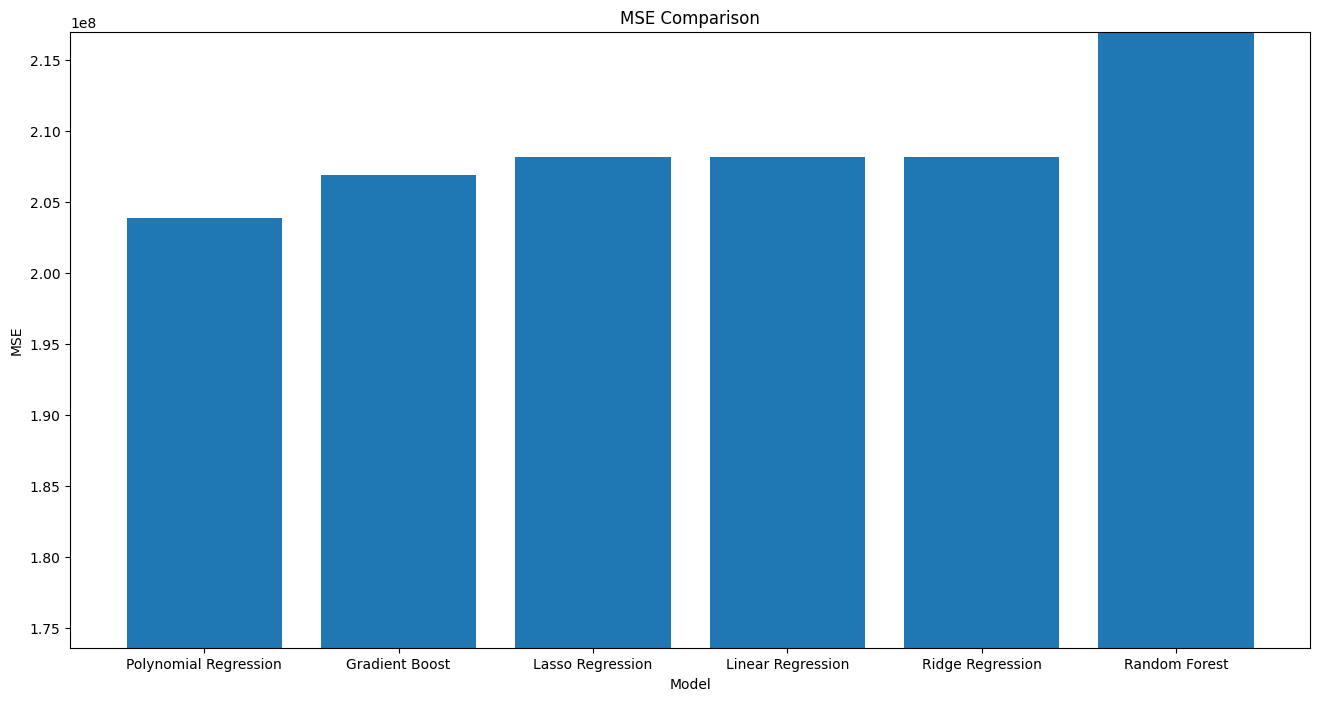

In [24]:
models_mse = {
    'Random Forest': rf_mse,
    'Gradient Boost': gb_mse,
    'Linear Regression': lr_mse,
    'Ridge Regression': rr_mse,
    'Lasso Regression': ls_mse,
    'Polynomial Regression': pr_mse,
}

models_mse = dict(sorted(models_mse.items(), key=lambda item: item[1]))

model_names = list(models_mse.keys())
mse_values = list(models_mse.values())

plt.figure(figsize=(16, 8))

plt.bar(model_names, mse_values)
plt.xlabel("Model")
plt.ylabel("MSE")
plt.title("MSE Comparison")
plt.ylim(max(mse_values) * 0.8, max(mse_values))
plt.show()

MAE

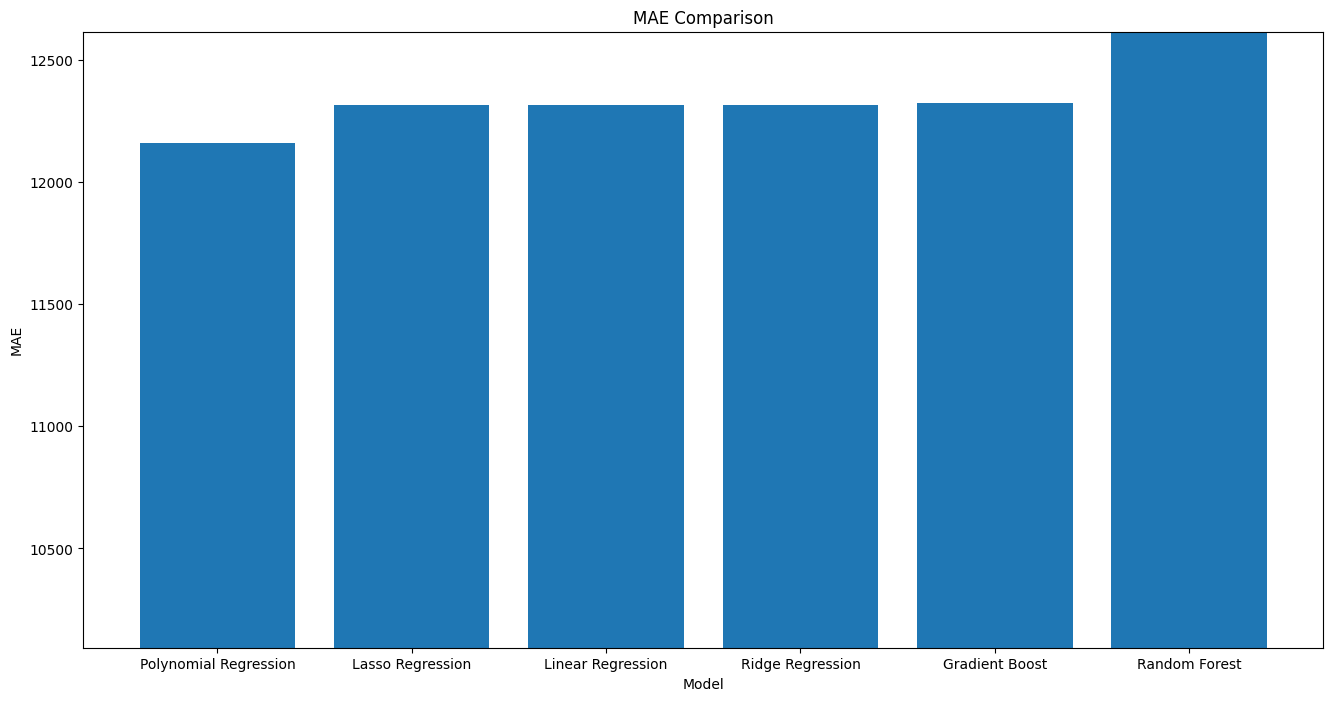

In [25]:
models_mae = {
    'Random Forest': rf_mae,
    'Gradient Boost': gb_mae,
    'Linear Regression': lr_mae,
    'Ridge Regression': rr_mae,
    'Lasso Regression': ls_mae,
    'Polynomial Regression': pr_mae,
}

models_mae = dict(sorted(models_mae.items(), key=lambda item: item[1]))

model_names = list(models_mae.keys())
mae_values = list(models_mae.values())

plt.figure(figsize=(16, 8))

plt.bar(model_names, mae_values)
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("MAE Comparison")
plt.ylim(max(mae_values) * 0.8, max(mae_values))
plt.show()

R2

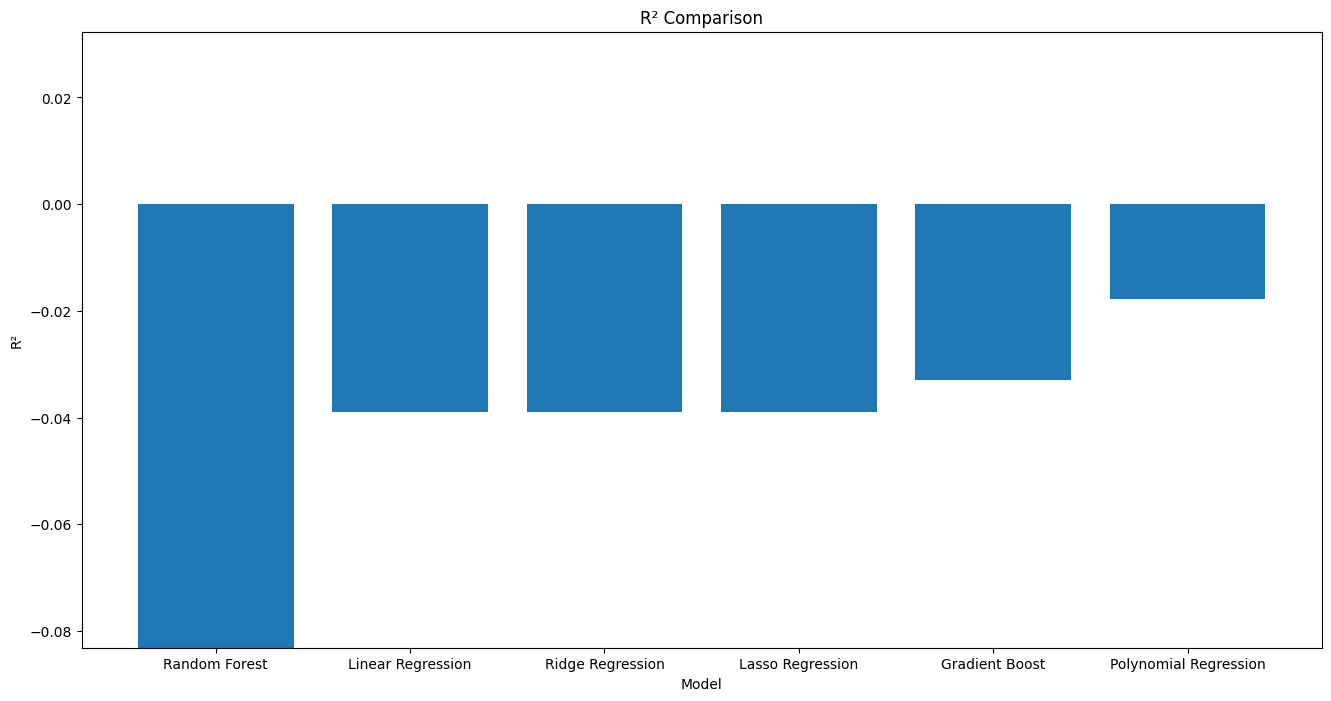

In [26]:
models_r2 = {
    'Random Forest': rf_r2,
    'Gradient Boost': gb_r2,
    'Linear Regression': lr_r2,
    'Ridge Regression': rr_r2,
    'Lasso Regression': ls_r2,
    'Polynomial Regression': pr_r2,
}

models_r2 = dict(sorted(models_r2.items(), key=lambda item: item[1]))

model_names = list(models_r2.keys())
r2_values = list(models_r2.values())

plt.figure(figsize=(16, 8))

plt.bar(model_names, r2_values)
plt.xlabel("Model")
plt.ylabel("R²")
plt.title("R² Comparison")
plt.ylim(min(r2_values), max(r2_values) + 0.05)
plt.show()

The comparison shows that Polynomial Regression has the least error when comparing to the testing data.

### Model Persistance

In [27]:
import pickle

In [28]:
with open('models/poly_regression.pkl', 'wb') as model_file:
    pickle.dump(trained_poly_regression_1w, model_file)

In [29]:
with open('models/gradient_boost_regression.pkl', 'wb') as model_file:
    pickle.dump(trained_gradient_boost_1w, model_file)